<img src="https://i.postimg.cc/ydZcb9cY/Hello.jpg">

<center><img src="https://i.postimg.cc/3Rws58nV/Camscanner-For-PC-Download-Camscanner-For-Windows-10-8-1-8-7.jpg"></center>

<center><img src="https://i.postimg.cc/B6zs6Lz2/target.png"></center>

# <span style="background-color:#0a2342;background-size: cover;font-family:tahoma;font-size:100%;text-align:left;border-radius:5px 5px 5px 5px; padding:10px; border:solid 2px #09375b"><span style="color:#79a9d1"><b>Step 1 | <b></span><span style="color:white">Import libraries</span></span>

<div style="background-color:#c2dcf0; padding: 20px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;">➡️ At first, import libraries that installed with <code>pip install</code> command.
    </p>
</div>

In [1]:
import cv2                                           # main librarie
import requests                                      # To load image from url
import numpy as np                                   # To works with arrays
from PIL import Image                                # To works with images 
from io import BytesIO                               # To read data from memory
import matplotlib.pyplot as plt                      # To plot images
import ipywidgets                                    # To use load and predict buttons
from IPython.display import display,clear_output     # To use load and predict buttons

# <span style="background-color:#0a2342;background-size: cover;font-family:tahoma;font-size:100%;text-align:left;border-radius:5px 5px 5px 5px; padding:10px; border:solid 2px #09375b"><span style="color:#79a9d1"><b>Step 2| <b></span><span style="color:white">Read Sample Image From URL</span></span>

<div style="background-color:#c2dcf0; padding: 20px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;">➡️ Using <b>requests</b> and <b>PIL</b> to load an image from an URL and show it.
    </p>
</div>

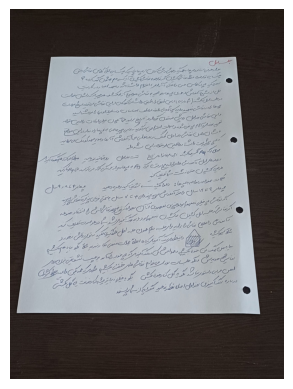

In [2]:
response = requests.get('https://i.postimg.cc/kGqWpBM3/page2.jpg')
img = Image.open(BytesIO(response.content))

# show imported image
plt.imshow(img)
plt.axis('off')
plt.show()

# <span style="background-color:#0a2342;background-size: cover;font-family:tahoma;font-size:100%;text-align:left;border-radius:5px 5px 5px 5px; padding:10px; border:solid 2px #09375b"><span style="color:#79a9d1"><b>Step 3 | <b></span><span style="color:white">Main Code</span></span>

<div style="background-color:#c2dcf0; padding: 20px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;">➡️ Now, define a function to recive imported images and get cam-scanner like image to output.
    </p>
</div>

In [3]:
def CamScanner(img) :
    # Convert imported image to a numpy array
    img = np.array(img)

    # Change image to GrayScale with 1 color channel
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Using threshold create a mask
    _, mask_page = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

    # create contours of mask
    countours, _ = cv2.findContours(mask_page, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # define 2 list to store area and P factor
    area_list = []
    p_list = []

    # Loop over contours to store area and arcLength in lists
    for cont in countours :
        area = cv2.contourArea(cont)
        area_list.append(area)

        p = cv2.arcLength(cont, True)
        p_list.append(p)

    # Choose bigest elemnt index
    page_index = np.argmax(area_list)

    # Create closed curve over choosed contours
    RasPoz = cv2.approxPolyDP(curve=countours[page_index], epsilon=0.005*p_list[page_index], closed=True)

    # Create a condition to insure to choose a rectangle(page)
    if len(RasPoz) == 4 :
        RasPoz_reshaped = np.reshape(RasPoz, (4, 2))

        # Image hight and width
        h, w, _ = img.shape

        # Choose point1 of current page edges and point2 of output edges ---> for Prespective
        p1 = np.float32(RasPoz_reshaped)
        p2 = np.float32([ [0, 0], [0, h], [w, h], [w, 0] ])

        # Create a prespective array with p1 & p2 
        arr_pres = cv2.getPerspectiveTransform(p1, p2)

        # Apply prespective on original image
        selected_page = cv2.warpPerspective(img, arr_pres, (w, h))

        # Change color map of selected image to gray
        selected_gray = cv2.cvtColor(selected_page, cv2.COLOR_BGR2GRAY)

        # Apply an adaptive threshold to gray-selected-image to make it more readable
        adaptive_selected = cv2.adaptiveThreshold(selected_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 12)

        # Show original and output image of function
        plt.figure(figsize=(15, 10))
        # Original image
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title('Original Image')
        plt.axis('off')
        # Converted image
        plt.subplot(1, 2, 2)
        plt.imshow(adaptive_selected, cmap='gray')
        plt.title('Converted Image')
        plt.axis('off')

        plt.show()

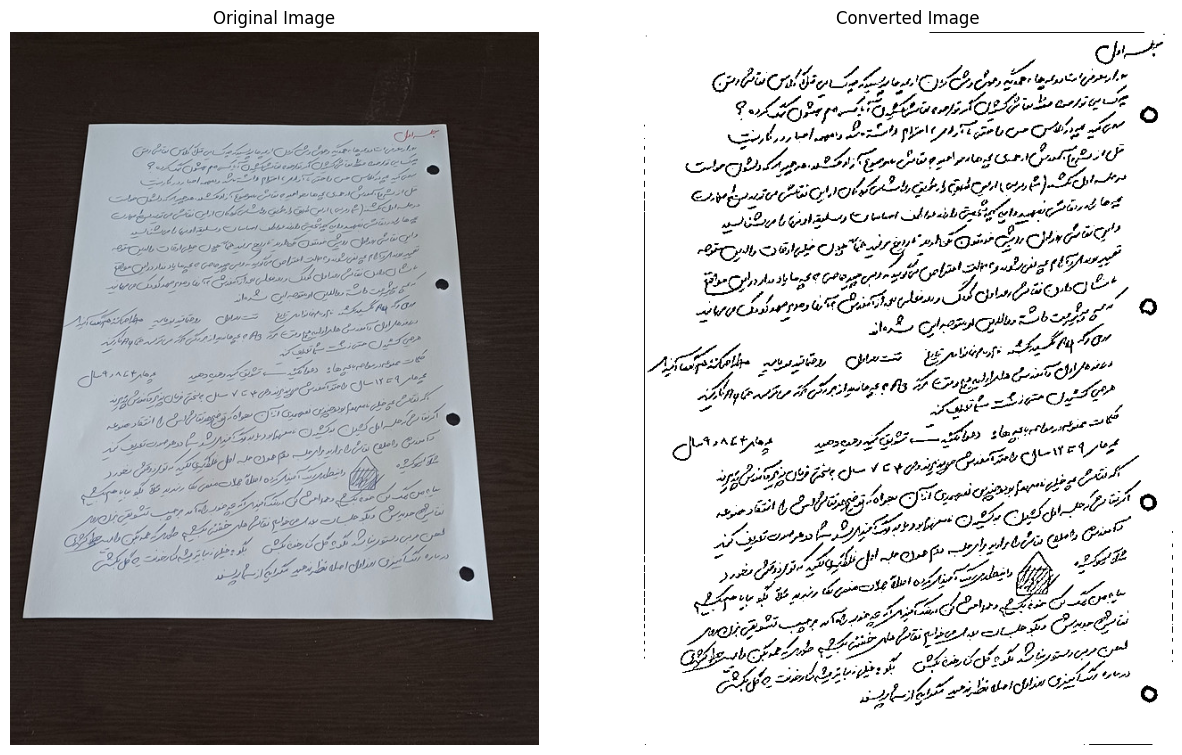

In [4]:
# Call the Function
CamScanner(img)

# <span style="background-color:#0a2342;background-size: cover;font-family:tahoma;font-size:100%;text-align:left;border-radius:5px 5px 5px 5px; padding:10px; border:solid 2px #09375b"><span style="color:#79a9d1"><b>Step 4 | <b></span><span style="color:white">Predict</span></span>

<div style="background-color:#c2dcf0; padding: 20px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;"><b>➡️ This part not working in kaggle environment, but if you download and run this notebook on your system, it works !
    </p>
</div>

In [5]:
# Create Upload button by ipywidget

upload = ipywidgets.FileUpload(accept='.jpg', multiple=False)
display(upload)

FileUpload(value=(), accept='.jpg', description='Upload')

In [6]:
button = ipywidgets.Button(description='Predict')
out = ipywidgets.Output()
def on_button_clicked(_):
    with out:
        clear_output()
        try:
            data = BytesIO(upload.value[0]['content'])
            img = Image.open(data)
            CamScanner(img)
            
        except:
            print('No Image Uploaded/Invalid Image File')
button.on_click(on_button_clicked)
ipywidgets.VBox([button,out])

<div style="border:3px solid navy; border-radius:30px; padding: 15px; background-size: cover; font-size:100%; text-align:left; background-image: url(https://i.postimg.cc/sXwGWcwC/download.jpg); background-size: cover">

<h4 align="left"><span style="font-weight:700; font-size:150%"><font color=#d10202>Author:</font><font color=navy> Nima Pourmoradi</font></span></h4>
<h6 align="left"><font color=#ff6200><a href='https://github.com/NimaPourmoradi'>github: https://github.com/NimaPourmoradi</font></h6>
<h6 align="left"><font color=#ff6200><a href='https://www.kaggle.com/nimapourmoradi'>kaggle : https://www.kaggle.com/nimapourmoradi</a></font></h6>
<h6 align="left"><font color=#ff6200><a href='https://www.linkedin.com/in/nima-pourmoradi-081949288/'>linkedin : www.linkedin.com/in/nima-pourmoradi</a></font></h6>
<h6 align="left"><font color=#ff6200><a href='https://t.me/Nima_Pourmoradi'>Telegram : https://t.me/Nima_Pourmoradi</a></font></h6>

<div style="background-color:#c5d8d1; padding: 25px 0px 10px 0px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:center">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;"><b>✅ If you like my notebook, please upvote it ✅
    </b></p>
</div>

<img src="https://i.postimg.cc/t4b3WtCy/1000-F-291522205-Xkrm-S421-Fj-SGTMR.jpg">